# Percent, correlation, describe and plots.
https://youtu.be/P90mCSsGE1c

In [1]:
import quandl;
import pandas as pd;

import pickle; #serializates everything

import matplotlib.pyplot as plt;
from matplotlib import style;
style.use("fivethirtyeight");

In [2]:
api_key = open("quandlapikey.txt", "r").read();

def state_list():
    fiddy_states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states");
    return fiddy_states[0][0][1:];

def grap_initial_state_data():
    states = state_list();
    main_df = pd.DataFrame();
    for ab in states:
        querry = "FMAC/HPI_" + ab;
        df = quandl.get(querry, authtoken = api_key);
        df.columns = [ab];
        if main_df.empty:
            main_df = df;
        else:
            main_df = main_df.join(df);

    print(main_df.head());
    
    pickle_out = open("./data/fiddy_states.pickle", "wb");
    pickle.dump(main_df, pickle_out);
    pickle_out.close();

In [3]:
grap_initial_state_data();
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");

In [4]:
HPI_data["TX2"] = HPI_data["TX"] * 2;
print(HPI_data[["TX", "TX2"]].head());

                   TX        TX2
Date                            
1975-01-31  32.659989  65.319979
1975-02-28  32.970745  65.941491
1975-03-31  33.542148  67.084297
1975-04-30  34.383316  68.766633
1975-05-31  34.652016  69.304031


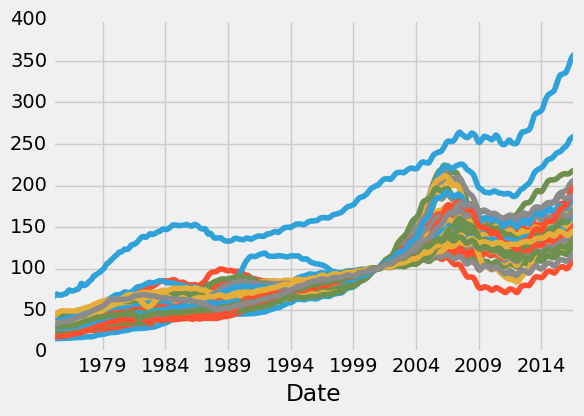

In [5]:
HPI_data.plot();
plt.legend().remove(); # ugly
plt.show();

In [7]:
def grap_initial_state_data_pct():
    states = state_list();
    main_df = pd.DataFrame();
    for ab in states:
        querry = "FMAC/HPI_" + ab;
        df = quandl.get(querry, authtoken = api_key);
        df = df.pct_change(); # <-------
        df.columns = [ab];
        if main_df.empty:
            main_df = df;
        else:
            main_df = main_df.join(df);

    print(main_df.head());
    
    pickle_out = open("./data/fiddy_states.pickle", "wb");
    pickle.dump(main_df, pickle_out);
    pickle_out.close();

In [8]:
grap_initial_state_data_pct();
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28  0.006265  0.014858  0.016885  0.008462  0.003562  0.011596   
1975-03-31  0.007275  0.014984  0.015467  0.007296  0.012152  0.011267   
1975-04-30  0.008841  0.015407  0.011761  0.005923  0.019665  0.010358   
1975-05-31  0.008343  0.016579  0.006354  0.005897  0.016106  0.008397   
1975-06-30  0.004630  0.017464 -0.000993  0.006401  0.007088  0.006907   
1975-07-31 -0.000803  0.017166 -0.009263  0.005610  0.007417  0.004714   
1975-08-31 -0.005271  0.015375 -0.015109  0.003465  0.013138 -0.000160   
1975-09-30 -0.006503  0.013191 -0.016194  0.000495  0.014310 -0.003531   
1975-10-31 -0.003418  0.011841 -0.009244 -0.000817  0.012948 -0.001422   
1975-11-30  0.002274  0.010445  0.003874  0.001247  0.008628  0.005095   
1975-12-31  0.008699  0.008595  0.0124

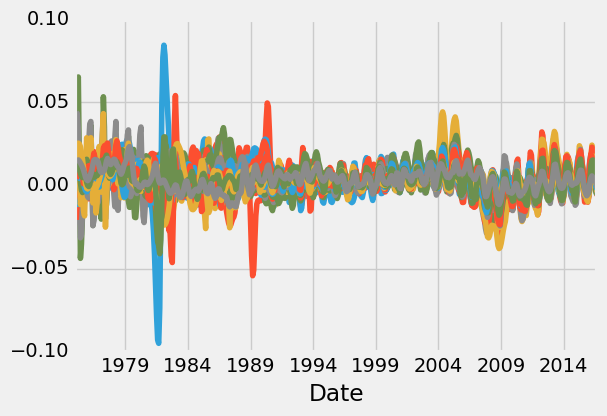

In [9]:
HPI_data.plot();
plt.legend().remove(); # ugly
plt.show();

In [12]:
def grap_initial_state_data_start_pct():
    states = state_list();
    main_df = pd.DataFrame();
    for ab in states:
        querry = "FMAC/HPI_" + ab;
        df = quandl.get(querry, authtoken = api_key);
        df.columns = [ab];        
        df[ab] = (df[ab] - df[ab][0]) / df[ab][0] * 100.0; # <-------
        if main_df.empty:
            main_df = df;
        else:
            main_df = main_df.join(df);

    print(main_df.head());
    
    pickle_out = open("./data/fiddy_states.pickle", "wb");
    pickle.dump(main_df, pickle_out);
    pickle_out.close();

In [13]:
grap_initial_state_data_start_pct();
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");

                    AL          AK          AZ          AR           CA  \
Date                                                                      
1975-01-31    0.000000    0.000000    0.000000    0.000000     0.000000   
1975-02-28    0.626500    1.485775    1.688504    0.846192     0.356177   
1975-03-31    1.358575    3.006473    3.261346    1.581956     1.575690   
1975-04-30    2.254726    4.593530    4.475810    2.183669     3.573196   
1975-05-31    3.107829    6.327600    5.139617    2.786248     5.241395   
1975-06-30    3.585231    8.184557    5.035190    3.444136     5.987360   
1975-07-31    3.502089   10.041682    4.062221    4.024416     6.773494   
1975-08-31    2.956561   11.733579    2.489967    4.384871     8.176235   
1975-09-30    2.287053   13.207406    0.830264    4.436568     9.724202   
1975-10-31    1.937454   14.547916   -0.101833    4.351232    11.144933   
1975-11-30    2.169245   15.744312    0.285140    4.481393    12.103889   
1975-12-31    3.058008   

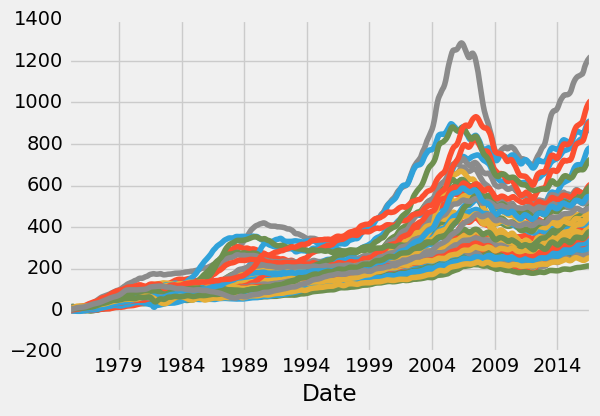

In [14]:
HPI_data.plot();
plt.legend().remove(); # ugly
plt.show();

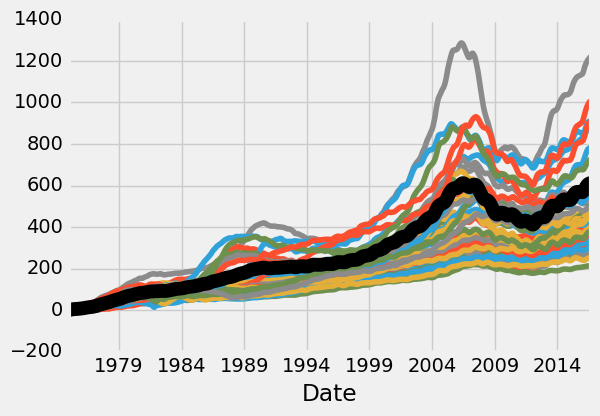

In [21]:
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken = api_key);
    df.columns = ["US"];        
    df["US"] = (df["US"] - df["US"][0]) / df["US"][0] * 100.0; # <-------
    return df;

fig = plt.figure();
ax1 = plt.subplot2grid((1, 1), (0, 0));

benchmark = HPI_Benchmark();

HPI_data.plot(ax = ax1);
benchmark.plot(ax = ax1, color = "k", linewidth = 10);

plt.legend().remove();
plt.show();

In [23]:
HPI_state_correlation = HPI_data.corr();
print(HPI_state_correlation.head());

          AL        AK        AZ        AR        CA        CO        CT  \
AL  1.000000  0.946418  0.937592  0.995119  0.942310  0.965541  0.953146   
AK  0.946418  1.000000  0.910237  0.967983  0.921818  0.960382  0.884600   
AZ  0.937592  0.910237  1.000000  0.936454  0.976776  0.919486  0.917688   
AR  0.995119  0.967983  0.936454  1.000000  0.945774  0.976929  0.944746   
CA  0.942310  0.921818  0.976776  0.945774  1.000000  0.938870  0.942463   

          DE        FL        GA    ...           SD        TN        TX  \
AL  0.982824  0.929395  0.978346    ...     0.976382  0.994551  0.940841   
AK  0.938068  0.900713  0.899525    ...     0.974957  0.958200  0.980514   
AZ  0.948801  0.994380  0.949167    ...     0.906742  0.932276  0.896961   
AR  0.977921  0.928081  0.968410    ...     0.986937  0.995595  0.962400   
CA  0.967911  0.985869  0.951573    ...     0.930504  0.945515  0.917953   

          UT        VT        VA        WA        WV        WI        WY  
AL  0.97948

In [24]:
print(HPI_state_correlation.describe());

              AL         AK         AZ         AR         CA         CO  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean    0.969390   0.939254   0.932725   0.971255   0.945922   0.954348   
std     0.026771   0.043011   0.028004   0.026940   0.024992   0.030143   
min     0.872598   0.771111   0.846203   0.861622   0.870084   0.838751   
25%     0.955706   0.929268   0.917464   0.965063   0.931971   0.939007   
50%     0.977250   0.949213   0.934992   0.978021   0.945327   0.960939   
75%     0.986240   0.963171   0.947947   0.989024   0.964504   0.975201   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              CT         DE         FL         GA    ...             SD  \
count  50.000000  50.000000  50.000000  50.000000    ...      50.000000   
mean    0.931882   0.963441   0.929353   0.952846    ...       0.959597   
std     0.039163   0.028701   0.031940   0.027883    ...       0.036501   
min     0.823583   0.864